## Reglas de Asociación

### 1) Descubrimiento de asociaciones

- Búsqueda de patrones frecuentes, asociaciones, correlaciones o estructuras causales entre conjuntos de artículos u objetos (datos) a partir de bases de datos transaccionales, relacionales y conjuntos de datos.


- Búsqueda de secuencias o patrones temporales


- Aplicaciones:
    - Análisis de carritos de compra
    - Diseño de catálogos,...
    - ¿Qué hay en el carrito? corbatas
    - ¿Cómo motivar al cliente a comprar los artículos que es probable que le gusten?


### 2) Reglas de asociación

- Objetivo de los algoritmos de extracción de reglas de asociación:
    - Dada una **base de datos de transacciones**, donde cada transacción es una lista de artículos (comprados por un cliente en una misma visita)
        
    - Encontrar todas las reglas que corelacionen la presencia de un conjunto de artículos con otro conjunto de artículos.
    
    - Ejemplo : 89% de la gente que compra neumáticos y accesorios para el automóvil, también requiere servicios.
    
    
La idea es obtener reglas de tipo:

- Antecedente => Consecuente [soporte, confianza]
- Compra (x , pañales) => compra(x, cerveza) [0.5% , 60%]


- Encontrar todas las reglas X ^ Y => Z con un mínimo de confianza y de soporte

- Soporte (s): La probabilidad de que una transacción cotenga {X ^ Y ^ Z}

- Confianza (c): Probabilidad condicional P( Z | X ^ Y )


### El soporte habitual podría ir entre el 5 y 10 %

Con un **Soporte**:

- Alto => habrá pocas reglas que ocurren con frecuencia (obviedades)
- Bajo => habrá muchas reglas que ocurren raramente ()


Con una **Confianza:**

- Alta => pocas reglas, pero todas **casi ciertas logicamente**

- Baja => muchas reglas, pero muchas de ellas muy **inciertas**

Un ejemplo de **Soporte** sería, dentro de todas las transacciones, el % frecuencia de la familia Corbata

y de **Confianza** sería, dentro del número de transacciones con Corbata, el % de otra Familia (Camisa p.e.)

#### Valores típicos

**Soporte:** 2-10 %

**Confianza** 70-90%

**Lift** hacer caso al lift > 1

### Lift
 ~~~py
    Lift(Burger→Ketchup) = (Confidence (Burger→Ketchup))/(Support (Ketchup))

    Lift(Burger→Ketchup) = 33.3/10
                     = 3.33
 ~~~
Básicamente, Lift nos dice que la probabilidad de comprar Burger y Ketchup juntos es 3.33 veces más que la probabilidad de comprar solo el ketchup. Un Lift de 1 significa que no hay asociación entre los productos A y B. Un Lift de más de 1 significa que los productos A y B tienen más probabilidades de comprarse juntos. Finalmente, un Lift de menos de 1 se refiere al caso en el que es poco probable que dos productos se compren juntos.
 
### 3) El algoritmo APRIORI

- Ecuentra las asociaciones más frecuentes 
- Itera sobre la base de datos hasta que las asociaciones obtenidas no tienen el soporte mínimo.
- Método simple pero robusto
- Salida intuitiva


- Requisitos:
  + No necesita fijar los atributos de los lados derecho (consecuente) e izquierdo (antecedente) de las reglas, pues se generan de manera automática
  + Existen variedades para tratar todo tipo de datos
  + Especificar mínimo soporte
  + Especificar máximo número de reglas.
  
El algortimo busca iterativamente conjuntos frecuentes con cardinalidad 1 hasta k (k-conjunto), y después **usa los conjuntos frecuentes para crear reglas de asociación.**

En el paso clave del descubrimiento de **conjuntos frecuentes**, se basa en el principio "a priori"

- Cualquier subconjunto de un conjunto de artículos frecuente debe ser frecuente 
  
  Ejemplo: si {A B} es un conjunto frecuente, entonces tanto {A} como {B} deberían ser frecuentes
  
Y por el contrario si existe algún conjunto "infrecuente", entonces no hay necesidad de generar sus superconjuntos

In [16]:
import pandas as pd
import pyodbc

#pyodbc
server = 'tcp:190.27.1.13\BI'
database = 'dbHighLife'
username = 'srodriguez'
password = 'Zmadgfv1'

cnxn = pyodbc.connect('DRIVER={ODBC Driver 13 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()


consulta = '''  select Marcas from Apriori_HL where Marcas <> '' and Fecha>='20210101' and Fecha<='20221231' '''

resultado = []


registros = cursor.execute(consulta).fetchall()




In [17]:
print('Registros : ',len(registros))

Registros :  41308


In [18]:
for x in registros:
    resultado.append(x.Marcas.split(","))

In [ ]:
# resultado

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori

In [20]:
reglas_asociacion = apriori(resultado, min_support=0.005,min_confidence=0.20, min_lift=1,min_length=2)

resultados_asociacion=list(reglas_asociacion)

In [21]:
#Filtramos para solo obtener asociaciones con más de un elemento, pues en los resultados nos arroja a partir de 1
# aunque los resultados de un elemento nos ayudaría a obtener la frecuencia (sporte) de cada producto individualmente

resultados_asociacion = list(filter(lambda x: len(x[0])>1 , resultados_asociacion))

In [22]:
print(len(resultados_asociacion))

15


## Resultados 
- Cada resultado podría tener varias combinaciones con el antecesor y el consecuente siempre y cuando estas cumplan con el mínimo de confianza.


La cantidad de resultados relacionados o derivados pueden verse así:
~~~py
for w in resultados_asociacion:
    print(len(w[2]))
~~~

Así que en un resultado dependiendo de la cantidad de items dentro de su conjunto se asociación pordría darse una multiplicaidad de resultados. 

Estos resultados se encontrarán anidados dentro del tercer elemento de la lista para cada resultado. o sea

- El primer elemento contiene el conjunto de elementos en los resutados

- EL segundo elemento contiene el Soporte del Resultado

- El tercer elemento contiene las estadísticas para cada cobinación de resultados 


Guardaremos todos los resultados en un DataFrame en **Pandas** para su óptima lectura

In [23]:
reg=0
print(resultados_asociacion[reg],'\n\n')

print(list(resultados_asociacion[reg][0]))
print(len(resultados_asociacion[reg][0]),'\n')


print(resultados_asociacion[reg][1],'\n')

print(resultados_asociacion[reg][2])
print(len(resultados_asociacion[reg][2]))

RelationRecord(items=frozenset({'HUGO BOSS', 'BOGGI'}), support=0.016945870049385105, ordered_statistics=[OrderedStatistic(items_base=frozenset({'BOGGI'}), items_add=frozenset({'HUGO BOSS'}), confidence=0.278108859753675, lift=1.1847087530890799)]) 


['HUGO BOSS', 'BOGGI']
2 

0.016945870049385105 

[OrderedStatistic(items_base=frozenset({'BOGGI'}), items_add=frozenset({'HUGO BOSS'}), confidence=0.278108859753675, lift=1.1847087530890799)]
1


In [24]:
resultados = []
antecedente=''
consecuente=''
for res in resultados_asociacion:
    
    for sub in range(len(res[2])):
        #print(res[2][sub],'\n')
        antecedente=""
        consecuente=""
        
        conjunto = ','.join(list(res[0]))
        soporte = res[1]
        antecedente = ','.join(list(res[2][sub][0]))
        consecuente=','.join(list(res[2][sub][1]))
        confianza = res[2][sub][2]
        Lift = res[2][sub][3]
        
        resultados.append(list((conjunto,soporte,antecedente,consecuente,confianza,Lift)))
        #antecedente= list(res[2][sub][0])
        #consecuente = list(res[2][sub][1])
        print('Conjunto : ',conjunto,'\nSoporte : ',res[1],'\n',antecedente, ' => ',consecuente ,'\nConfianza : ',confianza, '\nLift : ',Lift,'\n')
        
        

Conjunto :  HUGO BOSS,BOGGI 
Soporte :  0.016945870049385105 
 BOGGI  =>  HUGO BOSS 
Confianza :  0.278108859753675 
Lift :  1.1847087530890799 

Conjunto :  CALDERONIB,CALDERONI 
Soporte :  0.03202769439333785 
 CALDERONIB  =>  CALDERONI 
Confianza :  0.3265054294175716 
Lift :  1.0633306747383355 

Conjunto :  HUGO BOSS,CANALI 
Soporte :  0.005035344243245861 
 CANALI  =>  HUGO BOSS 
Confianza :  0.25552825552825553 
Lift :  1.0885182200021841 

Conjunto :  HIGHLIFE B,H.LIFE 
Soporte :  0.020262418901907622 
 HIGHLIFE B  =>  H.LIFE 
Confianza :  0.41231527093596065 
Lift :  1.0322375279892522 

Conjunto :  HL SLIM FI,H.LIFE 
Soporte :  0.03984700300183984 
 HL SLIM FI  =>  H.LIFE 
Confianza :  0.4965309200603319 
Lift :  1.2430726815667994 

Conjunto :  H.LIFE,HL TAILOR 
Soporte :  0.012806236080178173 
 HL TAILOR  =>  H.LIFE 
Confianza :  0.5052531041069723 
Lift :  1.2649088014818675 

Conjunto :  H.LIFE,HL TRENDY 
Soporte :  0.006633097705045028 
 HL TRENDY  =>  H.LIFE 
Confianza 

In [25]:
Asociaciones = pd.DataFrame(resultados,columns=['Conjunto','Soporte','Antecedente','Consecuente','Confianza','Lift'])

In [26]:
Asociaciones

Conjunto   Soporte           Antecedente  \
0                  HUGO BOSS,BOGGI  0.016946                 BOGGI   
1             CALDERONIB,CALDERONI  0.032028            CALDERONIB   
2                 HUGO BOSS,CANALI  0.005035                CANALI   
3                HIGHLIFE B,H.LIFE  0.020262            HIGHLIFE B   
4                HL SLIM FI,H.LIFE  0.039847            HL SLIM FI   
5                 H.LIFE,HL TAILOR  0.012806             HL TAILOR   
6                 H.LIFE,HL TRENDY  0.006633             HL TRENDY   
7             HL SLIM FI,HL TAILOR  0.007916             HL TAILOR   
8                HUGO BOSS,Z ZEGNA  0.006803               Z ZEGNA   
9        HUGO BOSS,CALDERONI,BOGGI  0.005495       CALDERONI,BOGGI   
10       HUGO BOSS,CALDERONI,BOGGI  0.005495       HUGO BOSS,BOGGI   
11     CALDE UPPE,H.LIFE,CALDERONI  0.005713  CALDE UPPE,CALDERONI   
12     H.LIFE,CALDERONIB,CALDERONI  0.011717     H.LIFE,CALDERONIB   
13  HUGO BOSS,CALDERONIB,CALDERONI  0.008400  CALDERONIB,CALDERONI   
14  HUGO BOSS,CALDERONIB,CALDERONI  0.008400  HUGO BOSS,CALDERONIB   
15     HL SLIM FI,H.LIFE,CALDERONI  0.009175  HL SLIM FI,CALDERONI   
16      HUGO BOSS,H.LIFE,CALDERONI  0.016389      HUGO BOSS,H.LIFE   

   Consecuente  Confianza      Lift  
0    HUGO BOSS   0.278109  1.184709  
1    CALDERONI   0.326505  1.063331  
2    HUGO BOSS   0.255528  1.088518  
3       H.LIFE   0.412315  1.032238  
4       H.LIFE   0.496531  1.243073  
5       H.LIFE   0.505253  1.264909  
6       H.LIFE   0.497278  1.244942  
7   HL SLIM FI   0.312321  3.891811  
8    HUGO BOSS   0.343941  1.465146  
9    HUGO BOSS   0.394097  1.678805  
10   CALDERONI   0.324286  1.056102  
11      H.LIFE   0.438662  1.098196  
12   CALDERONI   0.408439  1.330163  
13   HUGO BOSS   0.262283  1.117291  
14   CALDERONI   0.464525  1.512818  
15      H.LIFE   0.579511  1.450814  
16   CALDERONI   0.360682  1.174633

In [27]:
import networkx as nx

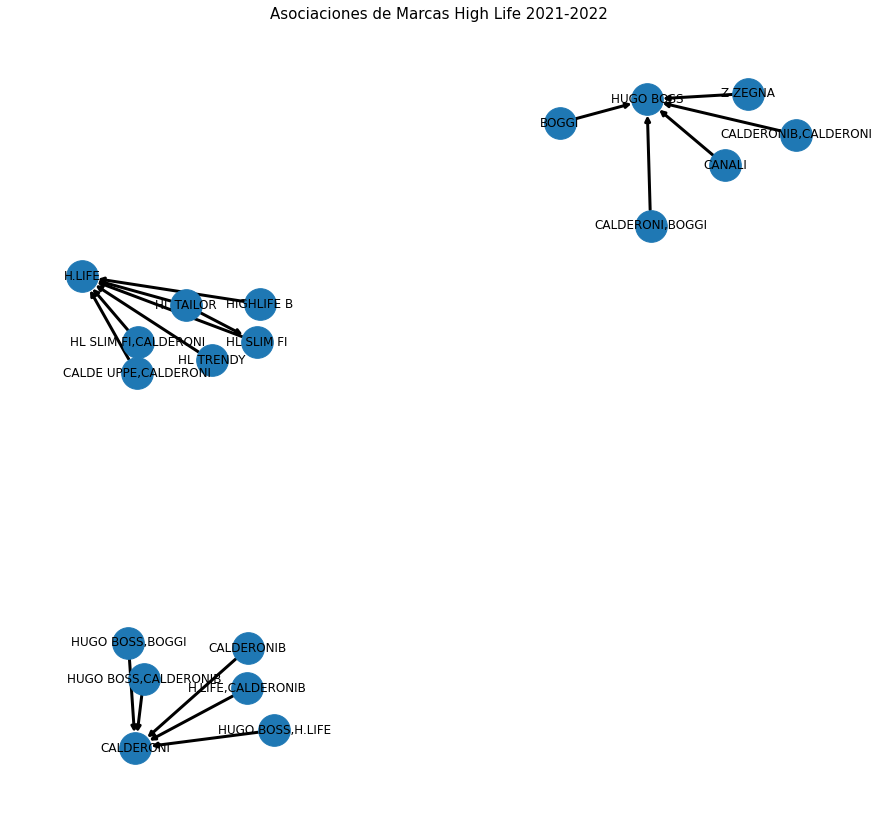

In [28]:
G = nx.DiGraph()
plt.figure(figsize=(12,11))

G.add_weighted_edges_from( list((row[2],row[3],row[4])) for row in resultados )

labels = nx.get_edge_attributes(G,'weight')

nx.draw(G, with_labels=True,node_size=1000, width=3)
#nx.draw_networkx_edge_labels(G,edge_labels=[b for a,b in labels.items()])
titulo='Asociaciones de Marcas High Life 2021-2022'
plt.title(titulo,size=15)
Asociaciones.to_excel(titulo+'.xlsx', index=False, encoding='utf-8-sig')

plt.draw()
plt.savefig(titulo+'.pdf')
plt.show()